In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [3]:
data = load_iris(as_frame=True).frame

In [4]:
X = data.drop('target',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

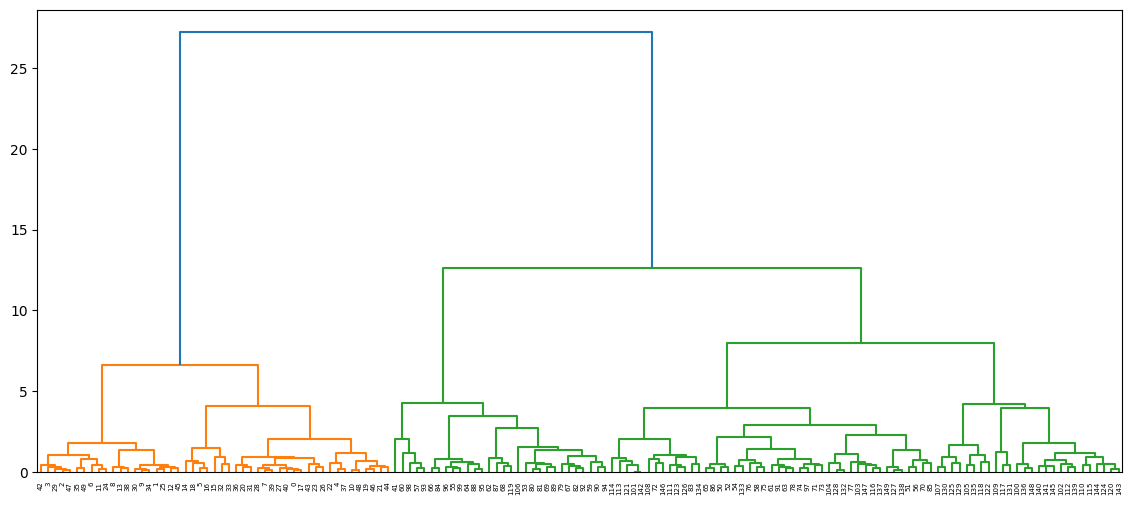

In [8]:
from scipy.cluster.hierarchy import linkage,dendrogram
linked = linkage(x_scaled,method='ward')
plt.figure(figsize=(14,6))
dendrogram(linked)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4,linkage='ward')
labels = agc.fit_predict(x_scaled)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [11]:
pca_df = pd.DataFrame(data = x_pca,columns = ['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


<Axes: xlabel='PCA1', ylabel='PCA2'>

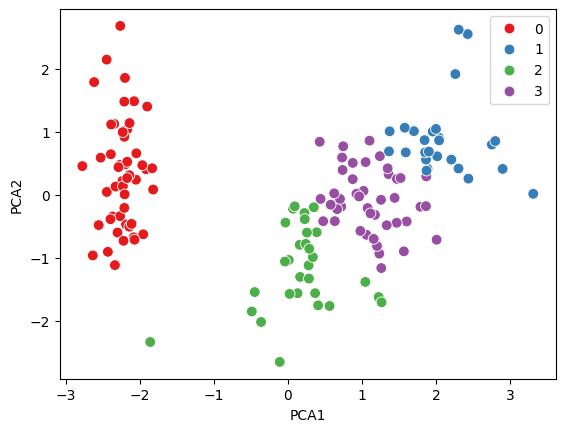

In [12]:
sns.scatterplot(data = pca_df, x='PCA1',y = 'PCA2',hue = labels,palette='Set1',s=60)